<a href="https://colab.research.google.com/github/Toomishe/Multi-Stage-Classification-of-Retinal-OCT-using-Multi-Scale-Ensemble-Deep-Architecture/blob/main/External_Data_Train_Test_Split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.layers import *
from keras.models import *
import os
import seaborn as sns
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.applications.densenet import preprocess_input
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import Model
from pickle import dump

from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import LabelEncoder
import random
from PIL import Image
import os

import random
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd




# MULTICLASS ON MULTI SCALE 3 CLASSES

In [ ]:
#Load model wIthout classifier/fully connected layers
base_modelM = tf.keras.applications.DenseNet201(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling='max',
    classes=3,
    classifier_activation=None  ,
)

#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in base_modelM.layers:
    layer.trainable = False
# base_modelM.summary()

In [ ]:
len(image)

1407

In [ ]:
# lOADING TRAIN DATA FOR MULTICLASS
directory = "E:/AA/DME/Publication_Dataset"

TRX224 = []
TRY224 = []
TRX112 =[]
TRY112 = []
TRX56 = []
TRY56 = []




In [ ]:
len(Images)

496

In [ ]:
# lOADING TRAIN DATA FOR MULTICLASS
directory = "E:/AA/DME/Publication_Dataset"

TRX224 = []
TRY224 = []
TRX112 =[]
TRY112 = []
TRX56 = []
TRY56 = []


for filenames in glob.glob(f'{directory}/*'):

      for images in glob.glob(f'{filenames}/*'):
#             print(images)
            x = images[30:36]
            y = images[30:33]
            Images = cv2.imread(images)

            # LOADING 224
            Images_224 = cv2.resize(Images, (224, 224), interpolation = cv2.INTER_AREA)

            #normalize the data set
            Images_224 = Images_224/255

            TRX224.append(Images_224)

            if x == "NORMAL":
                TRY224.append('NORMAL')
            elif y == "AMD":
                TRY224.append('AMD')
            elif y == "DME":
                TRY224.append('DME')




            #LOADING 112
            Images_112 = cv2.resize(Images, (112, 112), interpolation = cv2.INTER_AREA)

            #normalize the data set
            Images_112 = Images_112/255

            TRX112.append(Images_112)

            if x == "NORMAL":
                TRY112.append('NORMAL')
            elif y == "AMD":
                TRY112.append('AMD')
            elif y == "DME":
                TRY112.append('DME')



            #LOADING 56
            Images_56 = cv2.resize(Images, (56, 56), interpolation = cv2.INTER_AREA)

            #normalize the data set
            Images_56 = Images_56/255

            TRX56.append(Images_56)

            if x == "NORMAL":
                TRY56.append('NORMAL')
            elif y == "AMD":
                TRY56.append('AMD')
            elif y == "DME":
                TRY56.append('DME')




In [ ]:
len(TRY224)

3230

In [ ]:
#CONVERTING INPUTS TO ARRAY
TRX224=np.array(TRX224)
TRY224=np.array(TRY224)

TRX112=np.array(TRX112)
TRY112=np.array(TRY112)

TRX56=np.array(TRX56)
TRY56=np.array(TRY56)

In [ ]:
# Encoding Y Label
le = LabelEncoder()
MY224 = le.fit_transform(TRY224)
MY112 = le.fit_transform(TRY112)
MY56 = le.fit_transform(TRY56)

In [ ]:
#extracting features from Train set for 112 sizes
TRX112_Ft=base_modelM.predict(TRX112)

#extracting features from Train set for 56 sizes
TRX56_Ft=base_modelM.predict(TRX56)

#extracting features from Train set for 224 sizes
TRX224_Ft=base_modelM.predict(TRX224)


101/101 [==============================] - 263s 3s/step


In [ ]:
#Concatenate features of all sizes
x = np.concatenate([TRX112_Ft, TRX56_Ft, TRX224_Ft], axis=1)

In [ ]:
x.shape

(3230, 5760)

In [ ]:
MY224.shape

(3230,)

In [ ]:
from sklearn.model_selection import train_test_split

# training, validation and test set

x_train,x_test,Y_train,Y_test=train_test_split(x,MY224,train_size=0.9, random_state = 20)



In [ ]:
#CHECKING THE NUMBERS OF TRAIN AND TEST SET

print("shape of input - training set", x_train.shape)
print("shape of output - training set", Y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", Y_test.shape)

shape of input - training set (2907, 5760)
shape of output - training set (2907,)
shape of input - testing set (323, 5760)
shape of output - testing set (323,)


In [ ]:
model3 = Sequential()
model3.add(Flatten(input_shape=(5760,)))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.5))
model3.add(BatchNormalization())
model3.add(Dense(3, activation='softmax'))

# compile the model
model3.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.008), metrics=['accuracy'], loss='sparse_categorical_crossentropy')

model3.summary()

# train model using features generated from DenseNet model
model3.fit(x_train, Y_train, epochs=50, batch_size=128, validation_data=(x_test, Y_test))

# Evaluate the model 1
test_lossMC, test_accMC = model3.evaluate(x_test, Y_test)
print('DNN Test accuracy MC:', test_accMC)

# Evaluate the model 1
Y_predMC = model3.predict(x_test).argmax(axis=1)

print("DNN Accuracy MC: ", accuracy_score(Y_test, Y_predMC))

MSE_MC = metrics.mean_squared_error(Y_test, Y_predMC)
MSE_MC

In [ ]:
import joblib
joblib.dump(model3, 'MULTI_EXTERNAL_TTS.pkl')

['MULTI_EXTERNAL_TTS.pkl']

In [ ]:
print("DNN Accuracy MC: ", accuracy_score(Y_test, Y_predMC))

DNN Accuracy MC:  0.9969040247678018


In [ ]:
confusion_matrix(Y_test, Y_predMC)

array([[ 72,   0,   0],
       [  1, 112,   0],
       [  0,   0, 138]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_predMC))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.99      1.00       113
           2       1.00      1.00      1.00       138

    accuracy                           1.00       323
   macro avg       1.00      1.00      1.00       323
weighted avg       1.00      1.00      1.00       323



In [ ]:
def calculate_specificity(y_true, y_pred, class_label):
    cm = confusion_matrix(y_true, y_pred)
    tn = sum(cm.diagonal()) - cm[class_label, class_label]
    fp = sum(cm[:, class_label]) - cm[class_label, class_label]
    specificity = tn / (tn + fp)
    return specificity

def calculate_overall_specificity(y_true, y_pred, num_classes):
    overall_specificity = 0.0
    for class_label in range(num_classes):
        specificity = calculate_specificity(y_true, y_pred, class_label)
        overall_specificity += specificity
        print("Specificity for class", class_label, ":", specificity)
    overall_specificity /= num_classes
    print("Overall specificity:", overall_specificity)
    model_listMC=["Logistic Regression", 'SVM', 'Decision Tree', 'Random Forest','Naive Bayes']
    resultMC__ = pd.DataFrame ({"Model": model_listMC, "specificity":specificity, "overall":overall_specificity})

def calculate_sensitivity(y_true, y_pred, class_label):
    cm = confusion_matrix(y_true, y_pred)
    tp = cm[class_label, class_label]
    fn = sum(cm[class_label, :]) - tp
    sensitivity = tp / (tp + fn)
    return sensitivity

def calculate_overall_sensitivity(y_true, y_pred, num_classes):
    overall_sensitivity = 0.0
    for class_label in range(num_classes):
        sensitivity = calculate_sensitivity(y_true, y_pred, class_label)
        overall_sensitivity += sensitivity
        print("Sensitivity for class", class_label, ":", sensitivity)
    overall_sensitivity /= num_classes
    print("Overall sensitivity:", overall_sensitivity)
    model_listMC=["Logistic Regression", 'SVM', 'Decision Tree', 'Random Forest','Naive Bayes']
    resultMC__ = pd.DataFrame ({"Model": model_listMC, "sensitivity":sensitivity, "overall":overall_sensitivity})

calculate_overall_specificity(Y_test, Y_predMC, 3)
calculate_overall_sensitivity(Y_test, Y_predMC, 3)



Specificity for class 0 : 0.9960159362549801
Specificity for class 1 : 1.0
Specificity for class 2 : 1.0
Overall specificity: 0.99867197875166
Sensitivity for class 0 : 1.0
Sensitivity for class 1 : 0.9911504424778761
Sensitivity for class 2 : 1.0
Overall sensitivity: 0.9970501474926253


In [ ]:
# machine learning model_pipeline for different classifiers

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn. tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


model_pipeline = []
model_pipeline.append(LogisticRegression(solver='liblinear', max_iter=10000))
model_pipeline.append (SVC(probability=True, max_iter=10000))
model_pipeline.append(DecisionTreeClassifier ())
model_pipeline.append(RandomForestClassifier ())
model_pipeline.append(GaussianNB ( ))

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, roc_auc_score


model_listMC=["Logistic Regression", 'SVM', 'Decision Tree', 'Random Forest','Naive Bayes']

acc_listMC = []
cm_listMC = []
MSEMC = []
scores_avgMC = []
scores_stdMC = []

for model in model_pipeline:
  model.fit (x_train, Y_train)
  MulClass_pred = model.predict (x_test)
  acc_listMC.append(metrics.accuracy_score(Y_test, MulClass_pred))
  cm_listMC.append(confusion_matrix(Y_test, MulClass_pred))
  MSEMC.append(mean_squared_error(Y_test, MulClass_pred))
  scores_avgMC.append((cross_val_score(model, x, MY224, cv=5, scoring='f1_macro')).mean())
  scores_stdMC.append((cross_val_score(model, x, MY224, cv=5, scoring='f1_macro')).std())


resultMC = pd.DataFrame ({"Model": model_listMC, "Accuracy":acc_listMC, "MSE":MSEMC, "scores_avg":scores_avgMC, "scores_std":scores_stdMC})
resultMC.append({'Model': 'DNN', "Accuracy":test_accMC, "MSE":MSE_MC},  ignore_index=True)

C:\Users\Akinniyi\AppData\Local\Temp\ipykernel_16808\2575171364.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultMC.append({'Model': 'DNN', "Accuracy":test_accMC, "MSE":MSE_MC},  ignore_index=True)


,Model,Accuracy,MSE,scores_avg,scores_std
0,Logistic Regression,0.996904,0.003096,0.983813,0.010534
1,SVM,0.996904,0.003096,0.979557,0.011250
2,Decision Tree,0.829721,0.263158,0.706987,0.033323
3,Random Forest,0.975232,0.034056,0.909316,0.036504
4,Naive Bayes,0.869969,0.185759,0.784052,0.061658
5,DNN,1.000000,0.000000,NaN,NaN


In [ ]:
# machine learning model_pipeline for different classifiers

model_pipeline = []
model_pipeline.append(LogisticRegression(solver='liblinear', max_iter=10000))
model_pipeline.append (SVC(probability=True, max_iter=10000))
model_pipeline.append(DecisionTreeClassifier ())
model_pipeline.append(RandomForestClassifier ())
model_pipeline.append(GaussianNB ( ))
model_listMC=["Logistic Regression", 'SVM', 'Decision Tree', 'Random Forest','Naive Bayes']

for model in model_pipeline:
  model.fit (x_train, Y_train)
  MulClass_pred = model.predict (x_test)
  calculate_overall_specificity(Y_test, MulClass_pred, 3)
  calculate_overall_sensitivity(Y_test, MulClass_pred, 3)


Specificity for class 0 : 0.9960159362549801
Specificity for class 1 : 1.0
Specificity for class 2 : 1.0
Overall specificity: 0.99867197875166
Sensitivity for class 0 : 1.0
Sensitivity for class 1 : 0.9911504424778761
Sensitivity for class 2 : 1.0
Overall sensitivity: 0.9970501474926253
Specificity for class 0 : 1.0
Specificity for class 1 : 0.9952380952380953
Specificity for class 2 : 1.0
Overall specificity: 0.9984126984126984
Sensitivity for class 0 : 0.9861111111111112
Sensitivity for class 1 : 1.0
Sensitivity for class 2 : 1.0
Overall sensitivity: 0.9953703703703703
Specificity for class 0 : 0.92
Specificity for class 1 : 0.9064039408866995
Specificity for class 2 : 0.8827160493827161
Overall specificity: 0.9030399967564718
Sensitivity for class 0 : 0.8333333333333334
Sensitivity for class 1 : 0.7345132743362832
Sensitivity for class 2 : 0.8985507246376812
Overall sensitivity: 0.8221324441024326
Specificity for class 0 : 1.0
Specificity for class 1 : 0.9617224880382775
Specificity

In [ ]:
cm_listMC


[array([[ 72,   0,   0],
        [  1, 112,   0],
        [  0,   0, 138]], dtype=int64),
 array([[ 71,   1,   0],
        [  0, 113,   0],
        [  0,   0, 138]], dtype=int64),
 array([[ 59,   7,   6],
        [ 13,  88,  12],
        [  4,  13, 121]], dtype=int64),
 array([[ 68,   3,   1],
        [  0, 111,   2],
        [  0,   2, 136]], dtype=int64),
 array([[ 65,   6,   1],
        [  9,  92,  12],
        [  5,   9, 124]], dtype=int64)]

In [ ]:
cm_listMC.append(confusion_matrix(Y_test, Y_predMC))

In [ ]:
cm_listMC

[array([[ 72,   0,   0],
        [  1, 112,   0],
        [  0,   0, 138]], dtype=int64),
 array([[ 71,   1,   0],
        [  0, 113,   0],
        [  0,   0, 138]], dtype=int64),
 array([[ 59,   7,   6],
        [ 13,  88,  12],
        [  4,  13, 121]], dtype=int64),
 array([[ 68,   3,   1],
        [  0, 111,   2],
        [  0,   2, 136]], dtype=int64),
 array([[ 65,   6,   1],
        [  9,  92,  12],
        [  5,   9, 124]], dtype=int64),
 array([[ 72,   0,   0],
        [  0, 113,   0],
        [  0,   0, 138]], dtype=int64)]

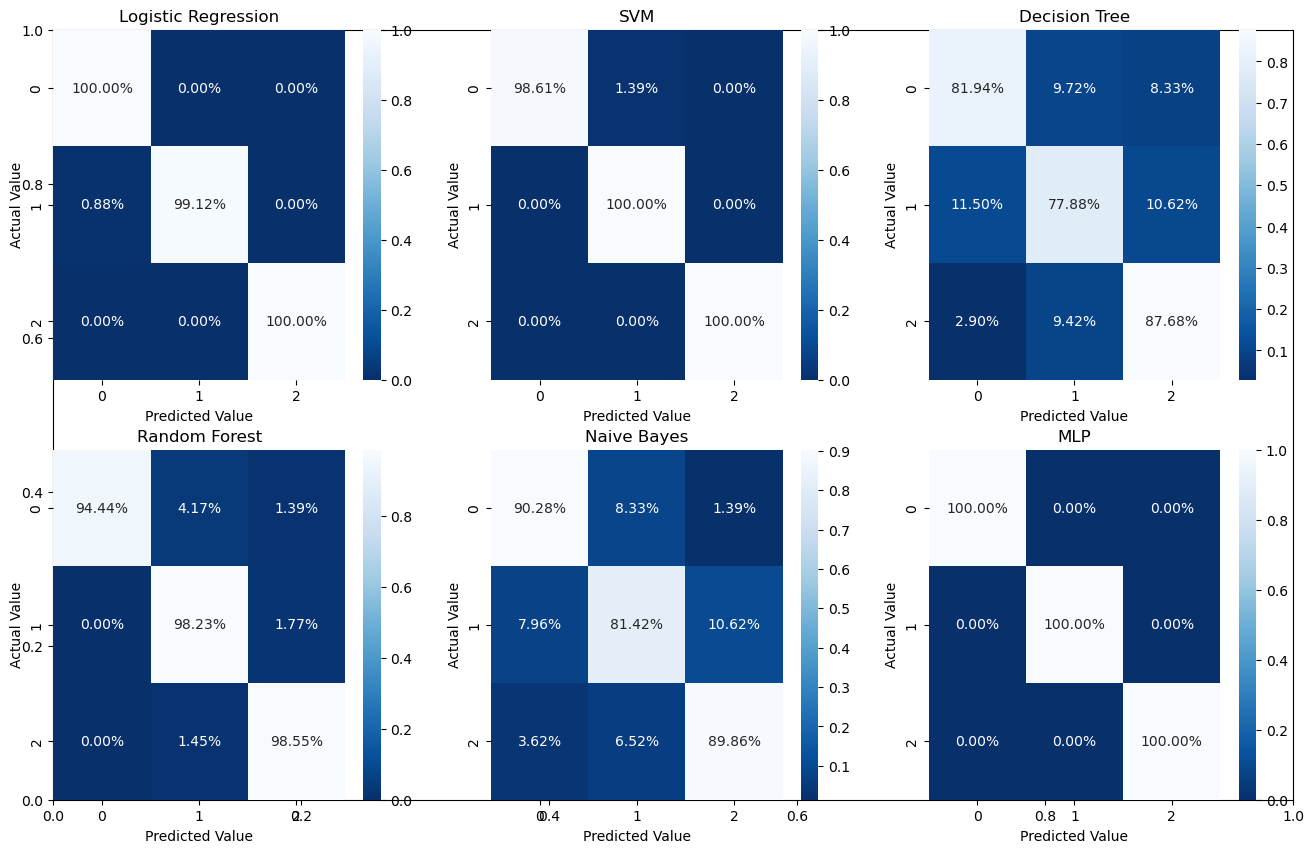

In [ ]:
# Plot confusion matrix
import seaborn as sns
from matplotlib import pyplot as plt

fig, axs = plt.subplots(figsize=(16, 10))
model_list_all=["Logistic Regression", 'SVM', 'Decision Tree', 'Random Forest','Naive Bayes', 'MLP']
for i in range (len(cm_listMC)):
  cmMC=cm_listMC[i]
  modelMC = model_list_all[i]
  sub=fig.add_subplot(2,3,i+1).set_title(modelMC)
  cm_sumMC = np.sum(cmMC, axis=1, keepdims=True)
#   cm_sumMC = np.sum(cmMC, axis=1, keepdims=True)
  cm_plotMC=sns.heatmap(cmMC/cm_sumMC.astype(float), annot=True,
            fmt='.2%', cmap='Blues_r')
  cm_plotMC.set_xlabel("Predicted Value")
  cm_plotMC.set_ylabel("Actual Value")

fig.savefig('confusion_matrix_multiclass_external.png')

# ROC CURVE MULTI CLASS

In [ ]:
#PLOTTING ROC CURVE FOR MULTICLASS

In [ ]:
label = np.unique(TRY224)
label

array(['AMD', 'DME', 'NORMAL'], dtype='<U6')

In [ ]:
classes = len(np.unique(TRY224))

In [ ]:
r_train,r_test,c_train,c_test=train_test_split(x,TRY224,test_size=0.2)

from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(Y_train)
Y_onehot_test = label_binarizer.transform(Y_test)
Y_onehot_test.shape  # (n_samples, n_classes)

(323, 3)

In [ ]:
label_binarizer.transform([0])

array([[1, 0, 0]])

In [ ]:
class_of_interest = 0
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

0

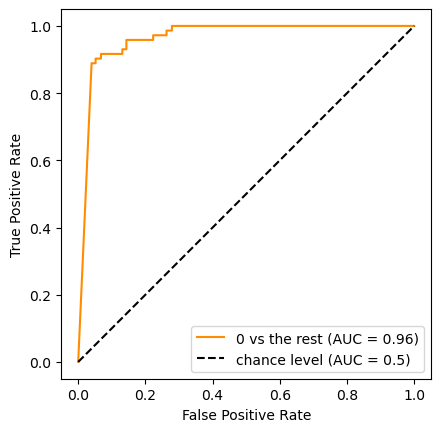

In [ ]:
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay

class_of_interest = 0

class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

Y_score = model.fit(x_train, Y_train).predict_proba(x_test)

RocCurveDisplay.from_predictions(
    Y_onehot_test[:, class_id],
    Y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
# plt.title("One-vs-Rest ROC curves:\n DRUSEN vs (DME, CNV)")
plt.legend()
plt.show()

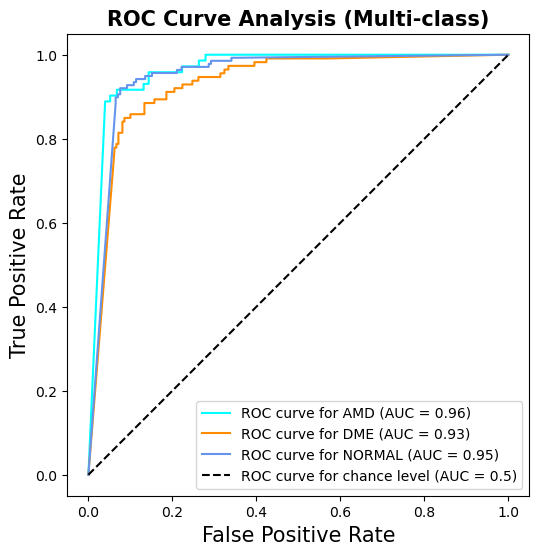

In [ ]:
from itertools import cycle

fig, ax = plt.subplots(figsize=(8, 6))

colors = cycle(["aqua", "darkorange", "cornflowerblue", "blue"])
for class_id, color in zip(range(classes), colors):
    RocCurveDisplay.from_predictions(
        Y_onehot_test[:, class_id],
        Y_score[:, class_id],
        name=f"ROC curve for {label[class_id]}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate", fontsize=15)
plt.ylabel("True Positive Rate", fontsize=15)
plt.title("ROC Curve Analysis (Multi-class)", fontweight='bold', fontsize=15)
plt.legend()
plt.show()
fig.savefig('ROC_multiclass_External.png')

11/11 [==============================] - 0s 3ms/step


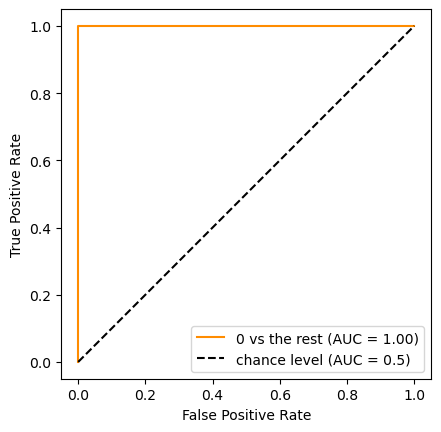

In [ ]:
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay

class_of_interest = 0

class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

Y_score_ = predicted_probabilities = model3.predict(x_test)
Y_score

RocCurveDisplay.from_predictions(
    Y_onehot_test[:, class_id],
    Y_score_[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
# plt.title("One-vs-Rest ROC curves:\n DRUSEN vs (DME, CNV)")
plt.legend()
plt.show()

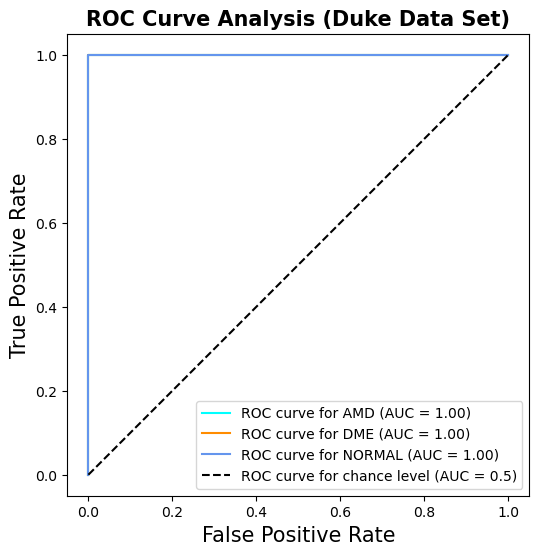

In [ ]:
from itertools import cycle

fig, ax = plt.subplots(figsize=(8, 6))

colors = cycle(["aqua", "darkorange", "cornflowerblue", "blue"])
for class_id, color in zip(range(classes), colors):
    RocCurveDisplay.from_predictions(
        Y_onehot_test[:, class_id],
        Y_score_[:, class_id],
        name=f"ROC curve for {label[class_id]}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate", fontsize=15)
plt.ylabel("True Positive Rate", fontsize=15)
plt.title("ROC Curve Analysis (Duke Data Set)", fontweight='bold', fontsize=15)
plt.legend()
plt.show()
fig.savefig('ROC_Curve_multiclass_MLP_External.png')